In [13]:
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from io import StringIO

In [4]:
path = '/Users/nandini/Desktop/dvhacks/'
devices = pd.read_csv('pmn96cur.txt', sep='\|', engine='python')
product_codes = pd.read_csv('foiclass.txt', sep='\|', engine='python')

In [3]:
list(devices)

['KNUMBER',
 'APPLICANT',
 'CONTACT',
 'STREET1',
 'STREET2',
 'CITY',
 'STATE',
 'COUNTRY_CODE',
 'ZIP',
 'POSTAL_CODE',
 'DATERECEIVED',
 'DECISIONDATE',
 'DECISION',
 'REVIEWADVISECOMM',
 'PRODUCTCODE',
 'STATEORSUMM',
 'CLASSADVISECOMM',
 'SSPINDICATOR',
 'TYPE',
 'THIRDPARTY',
 'EXPEDITEDREVIEW',
 'DEVICENAME']

In [6]:
list(product_codes)

['REVIEW_PANEL',
 'MEDICALSPECIALTY',
 'PRODUCTCODE',
 'DEVICENAME',
 'DEVICECLASS',
 'UNCLASSIFIED_REASON',
 'GMPEXEMPTFLAG',
 'THIRDPARTYFLAG',
 'REVIEWCODE',
 'REGULATIONNUMBER',
 'SUBMISSION_TYPE_ID',
 'DEFINITION',
 'PHYSICALSTATE',
 'TECHNICALMETHOD',
 'TARGETAREA',
 'Implant_Flag',
 'Life_Sustain_support_flag',
 'SummaryMalfunctionReporting']

In [7]:
product_codes = product_codes[['PRODUCTCODE', 'DEVICENAME']]
product_codes

,PRODUCTCODE,DEVICENAME
0,BRW,"Protector, Dental"
1,BRX,"Stool, Anesthesia"
2,BRY,"Cabinet, Table And Tray, Anesthesia"
3,BSE,"Analyzer, Gas, Helium, Gaseous-Phase"
4,BSF,"Absorber, Carbon-Dioxide"
5,BSI,"Algesimeter, Powered"
6,BSJ,"Mask, Gas, Anesthetic"
7,BSK,"Cuff, Tracheal Tube, Inflatable"
8,BSN,"Filter, Conduction, Anesthetic"
9,BSO,"Catheter, Conduction, Anesthetic"


In [5]:
devices = devices[['REVIEWADVISECOMM', 'PRODUCTCODE']]
devices

,REVIEWADVISECOMM,PRODUCTCODE
0,AN,MRN
1,SU,JCT
2,GU,NAM
3,RA,MOS
4,OR,JDC
5,AN,MZT
6,CV,DYB
7,TX,LEG
8,OB,NBV
9,TX,DIP


In [10]:
combined_df = pd.merge(devices, product_codes, on='PRODUCTCODE')
combined_df

,REVIEWADVISECOMM,PRODUCTCODE,DEVICENAME
0,AN,MRN,"Apparatus, Nitric Oxide Delivery"
1,AN,MRN,"Apparatus, Nitric Oxide Delivery"
2,AN,MRN,"Apparatus, Nitric Oxide Delivery"
3,AN,MRN,"Apparatus, Nitric Oxide Delivery"
4,AN,MRN,"Apparatus, Nitric Oxide Delivery"
5,AN,MRN,"Apparatus, Nitric Oxide Delivery"
6,AN,MRN,"Apparatus, Nitric Oxide Delivery"
7,AN,MRN,"Apparatus, Nitric Oxide Delivery"
8,AN,MRN,"Apparatus, Nitric Oxide Delivery"
9,AN,MRN,"Apparatus, Nitric Oxide Delivery"


In [14]:
col = ['REVIEWADVISECOMM', 'DEVICENAME']
combined_df = combined_df[col]
combined_df

,REVIEWADVISECOMM,DEVICENAME
0,AN,"Apparatus, Nitric Oxide Delivery"
1,AN,"Apparatus, Nitric Oxide Delivery"
2,AN,"Apparatus, Nitric Oxide Delivery"
3,AN,"Apparatus, Nitric Oxide Delivery"
4,AN,"Apparatus, Nitric Oxide Delivery"
5,AN,"Apparatus, Nitric Oxide Delivery"
6,AN,"Apparatus, Nitric Oxide Delivery"
7,AN,"Apparatus, Nitric Oxide Delivery"
8,AN,"Apparatus, Nitric Oxide Delivery"
9,AN,"Apparatus, Nitric Oxide Delivery"


In [16]:
combined_df.columns = ['REVIEWADVISECOMM', 'DEVICENAME']
combined_df['category_id'] = combined_df['REVIEWADVISECOMM'].factorize()[0]
combined_df

,REVIEWADVISECOMM,DEVICENAME,category_id
0,AN,"Apparatus, Nitric Oxide Delivery",0
1,AN,"Apparatus, Nitric Oxide Delivery",0
2,AN,"Apparatus, Nitric Oxide Delivery",0
3,AN,"Apparatus, Nitric Oxide Delivery",0
4,AN,"Apparatus, Nitric Oxide Delivery",0
5,AN,"Apparatus, Nitric Oxide Delivery",0
6,AN,"Apparatus, Nitric Oxide Delivery",0
7,AN,"Apparatus, Nitric Oxide Delivery",0
8,AN,"Apparatus, Nitric Oxide Delivery",0
9,AN,"Apparatus, Nitric Oxide Delivery",0


In [17]:
category_id_df = combined_df[['REVIEWADVISECOMM', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,REVIEWADVISECOMM,category_id
0,AN,0
21,SU,1
58,GU,2
64,RA,3
492,OR,4
515,CV,5
901,TX,6
902,CH,7
918,OB,8
940,IM,9


In [18]:
category_to_id = dict(category_id_df.values)
category_to_id

{'AN': 0,
 'SU': 1,
 'GU': 2,
 'RA': 3,
 'OR': 4,
 'CV': 5,
 'TX': 6,
 'CH': 7,
 'OB': 8,
 'IM': 9,
 'HO': 10,
 'DE': 11,
 'MI': 12,
 'OP': 13,
 'NE': 14,
 'EN': 15,
 'HE': 16,
 'PM': 17,
 'PA': 18,
 'MG': 19}

In [19]:
id_to_category = dict(category_id_df[['category_id', 'REVIEWADVISECOMM']].values)
id_to_category

{0: 'AN',
 1: 'SU',
 2: 'GU',
 3: 'RA',
 4: 'OR',
 5: 'CV',
 6: 'TX',
 7: 'CH',
 8: 'OB',
 9: 'IM',
 10: 'HO',
 11: 'DE',
 12: 'MI',
 13: 'OP',
 14: 'NE',
 15: 'EN',
 16: 'HE',
 17: 'PM',
 18: 'PA',
 19: 'MG'}

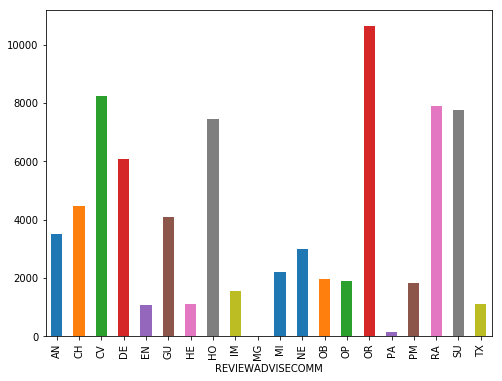

In [21]:
fig = plt.figure(figsize=(8,6))
combined_df.groupby('REVIEWADVISECOMM').DEVICENAME.count().plot.bar(ylim=0)
plt.show()

In [21]:
date_received = pd.to_datetime(devices['DATERECEIVED'])
decision_date = pd.to_datetime(devices['DECISIONDATE'])

In [151]:
days_to_decision = decision_date - date_received
days_to_decision = days_to_decision.iloc[0:76131]

In [152]:
days_to_decision = days_to_decision.dt.days
days_to_decision

0          4
1        154
2         13
3         51
4        273
5         32
6        331
7         60
8          1
9         56
10        56
11        29
12        59
13         5
14        58
15        60
16        85
17        71
18        32
19        71
20        38
21        86
22        85
23        30
24        80
25        44
26       307
27        86
28        89
29        90
        ... 
76101    230
76102    190
76103    157
76104    230
76105    195
76106    176
76107    197
76108     36
76109     36
76110     63
76111     26
76112    182
76113    264
76114     56
76115     90
76116     50
76117     48
76118    145
76119     19
76120     68
76121     64
76122     90
76123     84
76124     48
76125    127
76126     42
76127     75
76128     19
76129     36
76130     22
Length: 76131, dtype: int64

In [153]:
year_received = date_received.dt.year
year_received = year_received.iloc[0:76131]
year_received = year_received - 1990
year_received

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
5        10.0
6        10.0
7        10.0
8        10.0
9        10.0
10       10.0
11       10.0
12       10.0
13       10.0
14       10.0
15       10.0
16       10.0
17       10.0
18       10.0
19       10.0
20       10.0
21       10.0
22       10.0
23       10.0
24       10.0
25       10.0
26       10.0
27       10.0
28       10.0
29       10.0
         ... 
76101     9.0
76102     9.0
76103     9.0
76104     9.0
76105     9.0
76106     9.0
76107     9.0
76108     9.0
76109     9.0
76110     9.0
76111     9.0
76112     9.0
76113     9.0
76114     9.0
76115     9.0
76116     9.0
76117     9.0
76118     9.0
76119     9.0
76120     9.0
76121     9.0
76122     9.0
76123     9.0
76124     9.0
76125     9.0
76126     9.0
76127     9.0
76128     9.0
76129     9.0
76130     9.0
Name: DATERECEIVED, Length: 76131, dtype: float64

In [154]:
X = year_received.values.reshape(-1,1)
y = days_to_decision

In [155]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=101)

In [156]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [157]:
predictions = lm.predict(X_test)

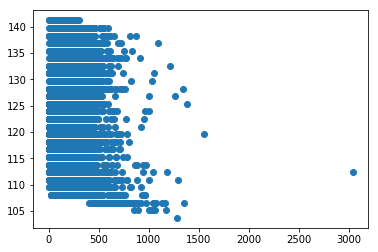

In [159]:
plt.scatter(y_test, predictions)

In [160]:
days_to_decision

0          4
1        154
2         13
3         51
4        273
5         32
6        331
7         60
8          1
9         56
10        56
11        29
12        59
13         5
14        58
15        60
16        85
17        71
18        32
19        71
20        38
21        86
22        85
23        30
24        80
25        44
26       307
27        86
28        89
29        90
        ... 
76101    230
76102    190
76103    157
76104    230
76105    195
76106    176
76107    197
76108     36
76109     36
76110     63
76111     26
76112    182
76113    264
76114     56
76115     90
76116     50
76117     48
76118    145
76119     19
76120     68
76121     64
76122     90
76123     84
76124     48
76125    127
76126     42
76127     75
76128     19
76129     36
76130     22
Length: 76131, dtype: int64